# <center>**RELATION ENTRE VARIABLES QUALITATIVES ET VARIABLES QUANTITATIVES**

In [2]:
# Code optionnel

from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Charger la nouvelle dataset nettoyée
df = pd.read_csv(r"C:\Users\TOSHIBA\Documents\analyse_project\titanic\titanic_clean.csv")

# Afficher les premières lignes pour vérifier
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Non-survécu,3ème classe,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Survécu,1ère classe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Survécu,3ème classe,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Survécu,1ère classe,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,Non-survécu,3ème classe,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


## Chargement du fichier de données nettoyé

Le fichier `titanic_clean.csv` a été généré suite au prétraitement des données initiales.  
Dans ce fichier :
- Les variables **Survived** et **Pclass** ont été transformées en labels textuels compréhensibles,
- Les valeurs manquantes dans **Age** ont été remplacées par la moyenne,
- Les valeurs manquantes dans **Embarked** ont été remplacées par la modalité la plus fréquente,
- La colonne **Cabin**, contenant trop de valeurs manquantes, a été supprimée.

Ce fichier servira de base pour toutes les analyses suivantes.


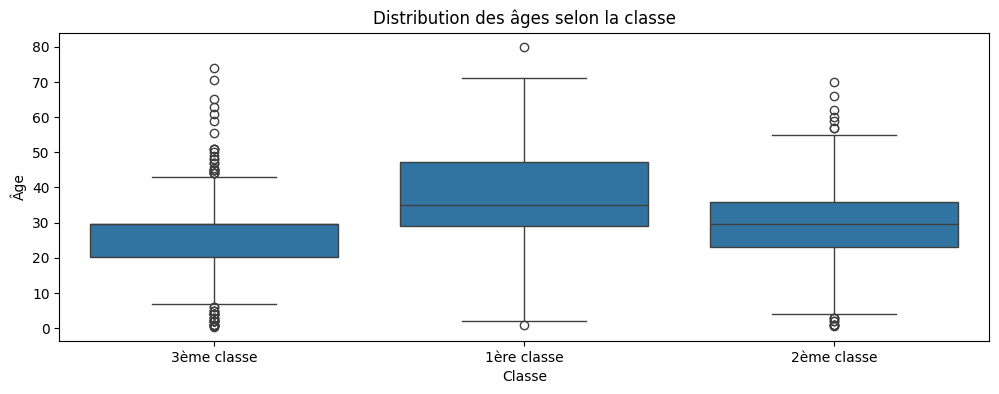

In [2]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel("Classe")
plt.ylabel("Âge")
plt.title("Distribution des âges selon la classe")
plt.show()


### **Distribution des âges par classe**  

**1. Âge médian** :  
- **1ère classe** : ~40 ans (population plus âgée, familles aisées).  
- **2ème classe** : ~30 ans (voyageurs intermédiaires).  
- **3ème classe** : ~25 ans (jeunes migrants/travailleurs).  

**2. Écarts sociaux** :  
- La **1ère classe** avait une large tranche d'âge (enfants à seniors), tandis que la **3ème classe** était majoritairement jeune.  
- **Enfants** : Plus nombreux en 1ère classe (évacuation prioritaire).  

**3. Lien avec la survie** :  
- Malgré leur âge avancé, les passagers de **1ère classe** survivaient mieux grâce à leur accès aux canots.  
- La **jeunesse de la 3ème classe** n'a pas compensé leur désavantage géographique.  

**Conclusion** : La classe sociale déterminait à la fois la démographie et les chances de survie, renforçant les inégalités.

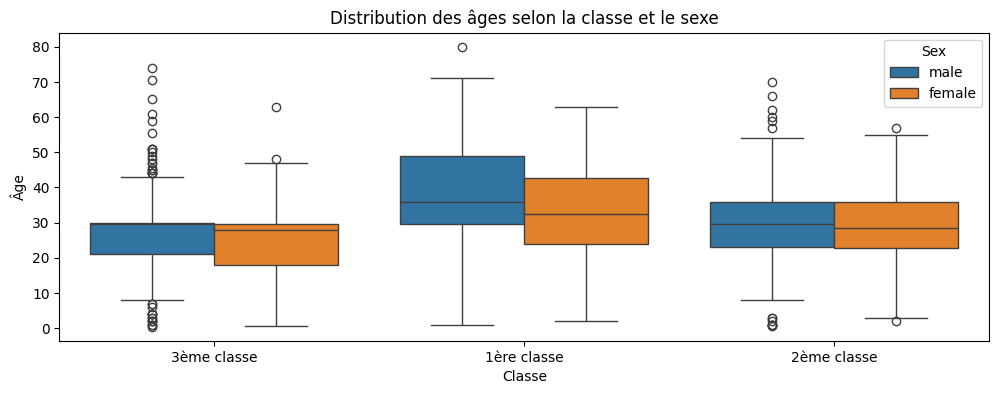

In [6]:
# la distribution des âges selon la classe et le sexe des passagers
plt.figure(figsize=(12, 4))

sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)

plt.xlabel('Classe')
plt.ylabel('Âge')
plt.title('Distribution des âges selon la classe et le sexe')

plt.show()


### **Distribution des âges par classe et sexe**

**1. Différences hommes-femmes**  
- **Femmes** :  
  - Légèrement plus jeunes que les hommes en 1ère/2ème classe  
  - Médiane ~35 ans (1ère), ~28 ans (2ème), ~22 ans (3ème)  
- **Hommes** :  
  - Plus âgés en 1ère classe (médiane ~40 ans)  
  - Écart réduit en 3ème classe (~24 ans)  

**2. Classe sociale**  
- **1ère classe** :  
  - Forte dispersion d'âge pour les femmes (5-70 ans)  
  - Hommes plus concentrés (30-50 ans)  
- **3ème classe** :  
  - Population très jeune pour les deux sexes  
  - Nombreux outliers jeunes 

**3. Implications**  
- Les femmes de la 1ère classe couvraient tous les âges, expliquant leur haute survie  
- Les hommes de 1ère classe, plus âgés, avaient moins d'avantage que leurs homologues féminins  
- La jeunesse des deux sexes en 3ème classe n'a pas suffi contre leur désavantage géographique  
- Le privilège de classe profitait surtout aux femmes de tous âges  
- L'âge des hommes ne compensait pas leur désavantage de genre en situation de crise

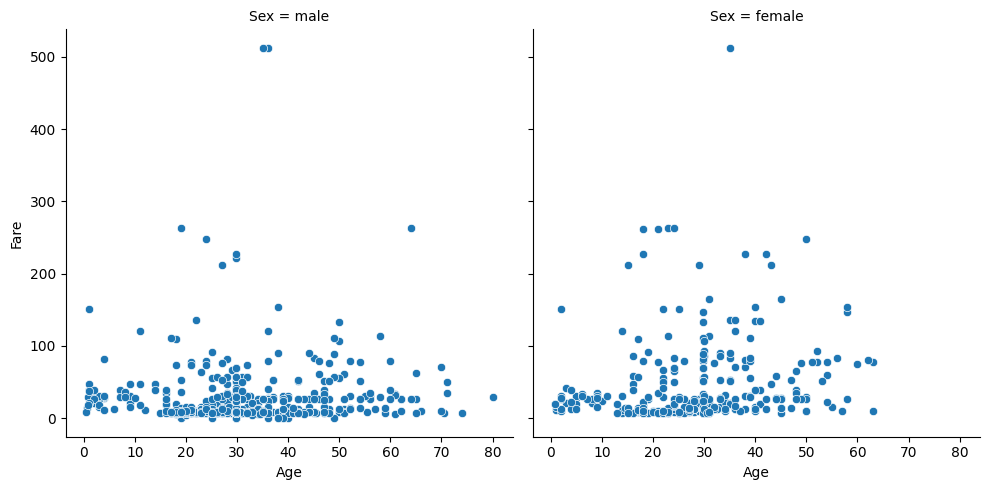

In [4]:
# Tarif payé en fonction de l'âge, différencié selon le sexe

sns.relplot(x = 'Age', y = 'Fare', col = 'Sex', kind = 'scatter', data = df)

plt.show()


### **Analyse des tarifs par âge et sexe**

**1. Structure tarifaire globale**
- Tarifs décroissants avec l'âge pour les deux sexes
- Pic de prix autour de 20-30 ans (période de voyage active)

**2. Différences hommes-femmes**
- **Femmes**:
  - Dispersion tarifaire plus marquée
  - Tarifs moyens plus élevés (particulièrement 20-40 ans)
  - Présence de valeurs extrêmes (tarifs très hauts)
  
- **Hommes**:
  - Distribution plus concentrée
  - Moins de variations extrêmes
  - Courbe de tarif plus régulière

**3. Points remarquables**
- Tarifs maximums:
  - Femmes: jusqu'à £500
  - Hommes: jusqu'à £300
- Jeunes enfants (<10 ans):
  - Tarifs similaires entre sexes
  - Pas de discrimination apparente

**4. Implications économiques**
- Les femmes payaient globalement plus cher
- Écart plus marqué pour la tranche 20-40 ans


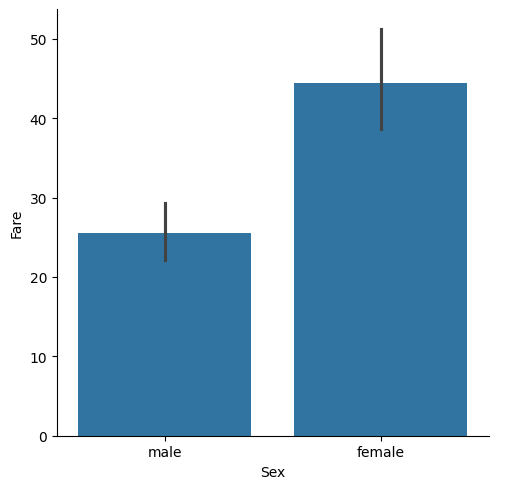

In [5]:
# Tarif payé en fonction du genre

sns.catplot(x = "Sex", y = "Fare", kind = "bar", data = df);

plt.show()


### **Analyse des tarifs moyens par genre**

**1. Différence tarifaire marquée**
- **Tarif moyen féminin** significativement plus élevé que masculin
- Écart visuellement évident sur le diagramme à barres

**2. Facteurs explicatifs possibles**
- **Composition des voyages** :
  - Femmes plus souvent accompagnées d'enfants (billets familiaux)
  - Préférence pour des cabines multiples
- **Services spécifiques** :
  - Espaces réservés (salons féminins)
  - Commodités supplémentaires

**3. Structure tarifaire révélatrice**
- Hommes : tarifs plus standardisés
- Femmes : plus grande variabilité (options luxe vs basique)
